<a href="https://colab.research.google.com/github/rodimendes/rest-analysis/blob/main/vendas2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de bibliotecas e pastas

In [2]:
import pandas as pd
import os
import pathlib
import sqlite3
import datetime as dt

### Sandra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Rodrigo

In [3]:
from google.colab import drive
drive.mount('/ShardDrives/')

Mounted at /ShardDrives/


## Formatando valores para todos o Dataframe

In [4]:
pd.set_option('float_format', '{:,.2f}'.format)

## Renomeando arquivos 
**Desnecessário para estes arquivos** 

Executado e nomes alterados

In [ ]:
"""folder = "/ShardDrives/MyDrive/rest_data_extraction /volume_vendas_produto/"
for file in os.listdir(folder):
    old_name = folder + file
    data = pd.read_excel(old_name)
    if file[:7] != 'vendas_':
      report_date = data['Unnamed: 1'][1][-10:]
      new_name = f"{folder}vendas_{report_date}.xlsx"
      os.rename(old_name, new_name)"""

'folder = "/ShardDrives/MyDrive/rest_data_extraction /volume_vendas_produto/"\nfor file in os.listdir(folder):\n    old_name = folder + file\n    data = pd.read_excel(old_name)\n    if file[:7] != \'vendas_\':\n      report_date = data[\'Unnamed: 1\'][1][-10:]\n      new_name = f"{folder}vendas_{report_date}.xlsx"\n      os.rename(old_name, new_name)'

## Data opening

### Sandra

In [ ]:
file = "/content/drive/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

### Rodrigo

In [5]:
file = "/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

## Visão geral do dataframe

In [6]:
data.head(10)

,Evolução de Vendas por Produto,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Séries: Todas,Data de Início: 01-01-2018,Data de Fim: 25-08-2022,NaN,NaN,NaN,NaN
5,Familia: Todas,Sub-Familia: Todas,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data,Código,Produto,Familia / Sub-Familia,Quantidade,Valor Total S/IVA,Valor Total
8,2018-01-03 00:00:00,100002,Avenida,Bebidas / Cerveja,4,13.90,17.10
9,2018-01-03 00:00:00,100003,Batata Doce,Comida / Evento,9,41.42,46.80


## Limpeza inicial

In [7]:
# Limpar linhas vazias e reiniciar o index

df = data.rename(columns=data.iloc[7]).iloc[8:-1].reset_index(drop=True)
df

,Data,Código,Produto,Familia / Sub-Familia,Quantidade,Valor Total S/IVA,Valor Total
0,2018-01-03 00:00:00,100002,Avenida,Bebidas / Cerveja,4,13.90,17.10
1,2018-01-03 00:00:00,100003,Batata Doce,Comida / Evento,9,41.42,46.80
2,2018-01-03 00:00:00,100005,Berbigão,Comida / Pratos,9,42.83,48.40
3,2018-01-03 00:00:00,100012,Cp Dashi,Bebidas / Soft Drinks,1,3.10,3.50
4,2018-01-03 00:00:00,100022,Cp Phaunus Pet Nat,Bebidas / Espumantes,2,13.01,16
...,...,...,...,...,...,...,...
68219,2022-08-24 00:00:00,101431,Alheta Pescada,Comida / Especiais,4,60.18,68
68220,2022-08-24 00:00:00,101432,Leite Frito,Comida / Sobremesas,6,47.79,54
68221,2022-08-24 00:00:00,101450,Extra Tosta,Comida / Snacks,1,3.54,4
68222,2022-08-24 00:00:00,101454,Cereja,Comida / Sobremesas,1,6.64,7.50


In [8]:
# Separando coluna Famila / Sub-Familia em duas

new_column = df['Familia / Sub-Familia'].str.split('/', n=1, expand=True)
df['familia'] = new_column[0]
df['sub_familia'] = new_column[1]

In [9]:
# Renomeando colunas

df = df[['Data', 'Código', 'Produto', 'familia', 'sub_familia', 'Quantidade', 'Valor Total S/IVA', 'Valor Total']]
df.columns = ['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade', 'total_s_iva', 'total']

### Tratamento de colunas


In [10]:
# Definindo o tipo adequado para as colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         68224 non-null  object
 1   codigo       68224 non-null  object
 2   produto      68224 non-null  object
 3   familia      68224 non-null  object
 4   sub_familia  68224 non-null  object
 5   quantidade   68224 non-null  object
 6   total_s_iva  68224 non-null  object
 7   total        68224 non-null  object
dtypes: object(8)
memory usage: 4.2+ MB


In [11]:
df.data = pd.to_datetime(df.data)
df['codigo'] = pd.to_numeric(df['codigo'])
df['quantidade'] = pd.to_numeric(df['quantidade'])
df['total_s_iva'] = pd.to_numeric(df['total_s_iva'])
df['total'] = pd.to_numeric(df['total'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         68224 non-null  datetime64[ns]
 1   codigo       68224 non-null  int64         
 2   produto      68224 non-null  object        
 3   familia      68224 non-null  object        
 4   sub_familia  68224 non-null  object        
 5   quantidade   68224 non-null  float64       
 6   total_s_iva  68224 non-null  float64       
 7   total        68224 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 4.2+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [12]:
df.columns

Index(['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade',
       'total_s_iva', 'total'],
      dtype='object')

## Criação do Banco de Dados
**Etapa desnecessária para este caso de já termos o dataset completo e não ser necessário atualizar com novos dados**


In [13]:
#bd = sqlite3.connect("vendas_restaurantes.db")

In [14]:
#cursor = bd.cursor()

### A célula abaixo só é necessário executar na primeira vez, para a criação da tabela no banco de dados

In [15]:
#cursor.execute("CREATE TABLE 'Vendas Restauração 2018_2022' (data INTEGER, codigo INT, produto TEXT, familia TEXT, sub_familia TEXT, quantidade INT, total_s_iva REAL, total REAL)")

In [16]:
#df.head(2)

In [17]:
#for index, row in df.iterrows():
#    data = row[0]
#    codigo = row[1]
#    produto = row[2]
#    familia = row[3]
#    sub_familia = row[4]
#    quantidade = row[5]
#    total_s_iva = row[6]
#    total = row[7]
#    cursor.execute('''INSERT INTO 'Vendas Restauração 2018_2022' \
#                    (data, codigo, produto, familia, sub_familia, quantidade, total_s_iva, total) VALUES (?,?,?,?,?,?,?,?)''', \
#                    (str(data), codigo, produto, familia, sub_familia, quantidade, total_s_iva, total))
#    
#    bd.commit()

##**Primeiras explorações**

In [18]:
# Faturamento total do período

faturamento_total = df.total.sum()
f'A empresa faturou {faturamento_total:,.2f} de euros durante o período'

'A empresa faturou 4,603,194.17 de euros durante o período'

In [19]:
# Faturamento por família

faturamento_familia = df[['familia', 'total']].groupby(by='familia').sum()
faturamento_familia.sort_values(by='total', ascending=False)

,total
familia,
Comida,"3,058,871.40"
Bebidas,"1,464,298.98"
Outros,"79,387.59"
Talho,370.00
Sem Familia Definida,226.00
Peixaria,20.70
Mercearia,19.50


###Rentabilidade diária

In [20]:
dt.date.isoweekday(df.data[0])

3

In [21]:
# Criando uma lista com todos os dias de venda e atribuindo a uma nova coluna

dia_semana = []
for dia in df.data:
  dia_semana.append(dt.date.isoweekday(dia))

df['dia_semana'] = dia_semana
df.head(2)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
0,2018-01-03,100002,Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3
1,2018-01-03,100003,Batata Doce,Comida,Evento,9.00,41.42,46.80,3


In [22]:
rentabilidade_diaria = df[['quantidade','total', 'dia_semana']].groupby(by='dia_semana').sum()
rentabilidade_diaria

,quantidade,total
dia_semana,,
1,"2,342.00","31,823.80"
2,"4,147.00","47,654.04"
3,"92,440.01","744,466.71"
4,"104,169.00","888,494.16"
5,"130,162.00","1,082,017.64"
6,"132,789.00","1,089,471.37"
7,"90,730.00","719,266.45"


In [23]:
# Rentabilidade diária, em ordem decrescente, para o período.

rentabilidade_diaria.sort_values(by='total', ascending=False)

,quantidade,total
dia_semana,,
6,"132,789.00","1,089,471.37"
5,"130,162.00","1,082,017.64"
4,"104,169.00","888,494.16"
3,"92,440.01","744,466.71"
7,"90,730.00","719,266.45"
2,"4,147.00","47,654.04"
1,"2,342.00","31,823.80"


In [24]:
# Dia da semana possui mais entradas, ou seja, mais linhas.

df.dia_semana.value_counts()

5    14997
6    14638
4    13709
3    12233
7    11525
2      696
1      426
Name: dia_semana, dtype: int64

In [25]:
## Por que as segundas e possuem valores muito baixos?
## Quais os dias e horários de funcionamento do restaurante?

In [26]:
df[df['dia_semana'] == 1]

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
1375,2018-02-05,100131,Menu Grupo,Outros,,29.00,513.27,580.00,1
3218,2018-04-02,100317,Aluguer Espaço,Outros,,1.00,"1,500.00","1,845.00",1
3219,2018-04-02,100318,Jantar grupo privado,Outros,,40.00,"1,951.22","2,400.00",1
3220,2018-04-02,100319,Extra,Outros,,1.00,24.39,30.00,1
11200,2018-09-24,2,Porco Panado,Comida,Snacks,59.00,215.04,264.50,1
...,...,...,...,...,...,...,...,...,...
56992,2021-12-27,101406,G Wave,Bebidas,G Branco PT,1.00,32.52,40.00,1
56993,2021-12-27,101412,G Humus Curtimenta,Bebidas,G Branco PT,1.00,22.76,28.00,1
56994,2021-12-27,101413,Cp Sol Passito,Bebidas,Copo Outros,1.00,11.38,14.00,1
56995,2021-12-27,101418,G Capucha Cedro Alvarao,Bebidas,G Branco PT,1.00,40.65,50.00,1


##**Regressão Linear - Faturamento futuro**##

In [27]:
# Bibliotecas para construção do modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [28]:
object_df = df.select_dtypes(include=['object']).copy()

In [29]:
object_df

,produto,familia,sub_familia
0,Avenida,Bebidas,Cerveja
1,Batata Doce,Comida,Evento
2,Berbigão,Comida,Pratos
3,Cp Dashi,Bebidas,Soft Drinks
4,Cp Phaunus Pet Nat,Bebidas,Espumantes
...,...,...,...
68219,Alheta Pescada,Comida,Especiais
68220,Leite Frito,Comida,Sobremesas
68221,Extra Tosta,Comida,Snacks
68222,Cereja,Comida,Sobremesas


In [30]:
anos = []
for dia in df['data']:
  year = dia.year
  anos.append(year)

print(len(anos))

68224


In [31]:
df['ano'] = anos

In [32]:
# Agrupar por anos e analisar ano a ano

In [33]:
# Célula teste

df.sample()

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano
59487,2022-03-12,101376,Shiso,Comida,Snacks,23.00,91.59,103.50,6,2022


In [34]:
df_2018 = df[df['ano'] == 2018]
df_2019 = df[df['ano'] == 2019]
df_2020 = df[df['ano'] == 2020]
df_2021 = df[df['ano'] == 2021]
df_2022 = df[df['ano'] == 2022]

In [35]:
print(f'Ano 2018 - {df_2018.shape}')
print(f'Ano 2019 - {df_2019.shape}')
print(f'Ano 2020 - {df_2020.shape}')
print(f'Ano 2021 - {df_2021.shape}')
print(f'Ano 2022 - {df_2022.shape}')

Ano 2018 - (15713, 10)
Ano 2019 - (18731, 10)
Ano 2020 - (10630, 10)
Ano 2021 - (12220, 10)
Ano 2022 - (10930, 10)


In [36]:
df[['quantidade', 'total', 'ano']].groupby(by='ano').sum()

,quantidade,total
ano,,
2018,"128,783.00","970,481.34"
2019,"172,435.00","1,354,907.69"
2020,"69,450.00","561,141.00"
2021,"95,049.01","831,493.13"
2022,"91,062.00","885,171.01"


### Rodrigo - **Regressão Linear para 2018**

In [37]:
df_2018

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano
0,2018-01-03,100002,Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3,2018
1,2018-01-03,100003,Batata Doce,Comida,Evento,9.00,41.42,46.80,3,2018
2,2018-01-03,100005,Berbigão,Comida,Pratos,9.00,42.83,48.40,3,2018
3,2018-01-03,100012,Cp Dashi,Bebidas,Soft Drinks,1.00,3.10,3.50,3,2018
4,2018-01-03,100022,Cp Phaunus Pet Nat,Bebidas,Espumantes,2.00,13.01,16.00,3,2018
...,...,...,...,...,...,...,...,...,...,...
15708,2018-12-31,100598,Cp Pulso,Bebidas,Copo Tinto,1.00,4.88,6.00,1,2018
15709,2018-12-31,100607,G Roumanie,Bebidas,G Tinto Int,1.00,45.53,56.00,1,2018
15710,2018-12-31,100617,Cp Atanasius,Bebidas,Copo Tinto,2.00,16.26,20.00,1,2018
15711,2018-12-31,100619,Cp Chapel,Bebidas,Copo Tinto,2.00,13.82,17.00,1,2018


In [41]:
df_2018[['data', 'quantidade', 'total']].groupby(by='data').sum()

,quantidade,total
data,,
2018-01-03,207.00,"1,249.02"
2018-01-04,305.00,"2,627.98"
2018-01-05,362.00,"2,891.90"
2018-01-06,528.00,"3,727.40"
2018-01-07,608.00,"3,457.17"
...,...,...
2018-12-27,752.00,"5,478.27"
2018-12-28,938.00,"6,493.39"
2018-12-29,902.00,"6,032.33"


In [119]:
# Definindo variáveis
# Simple Linear Regression - one feature, one input

# 1) Dia da semana e total

X = df_2018.drop(columns=['total', 'data'])
y = df_2018['total']

print(X.shape)
print(y.shape)

(15713, 8)
(15713,)


In [120]:
# Creating a model

linear_regression_model = LinearRegression()

In [121]:
# Sorting out values into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [122]:
# Fitting the model

linear_regression_model.fit(X_train, y_train)

ValueError: ignored

In [99]:
# Using the model to predict, based on X_test

y_pred = linear_regression_model.predict(X_test)

In [103]:
# Obtaining the coefficient of determination, 𝑅².

linear_regression_model.score(X_train, y_train)

0.0014400483777186057

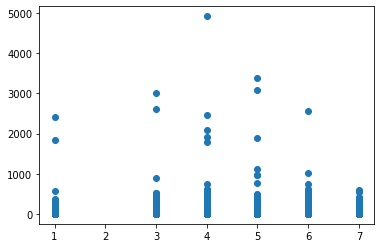

In [106]:
plt.scatter(X_train, y_train)

plt.show()

## Comandos GITHUB

In [ ]:
# Fazer o git funcionar para o trabalho
"""
Para abrir:
  Clicar ARQUIVO >> ABRIR NOTEBOOK
  Selecionar a aba GITHUB e localizar o repositório 'rodimendes/rest-analysis', o branch MAIN e clicar no arquivo 'vendas2018_2022.ipynb'
Ao sair:
  Clicar ARQUIVO >> SALVAR UMA CÓPIA NO GITHUB
  Na janela que se abrirá, conferir repositório, branch e clicar em OK
"""

In [ ]:
# Agrupar por mês e analisar mês a mês (??)
# Agrupar por dia e analisar o dia a dia
# Fazer RL e identificar o comportamento da sazonalidade e a "outra"
# Fazer Time Series e comparar modelos
# meses = []
